In [15]:
# 필요 모듈 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터
from sklearn.datasets import load_boston

# 모델 및 평가metric
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [16]:
boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns= boston.feature_names)
bostonDF['PRICE'] = boston.target
y = bostonDF.PRICE
X = bostonDF.drop(columns='PRICE')

In [17]:
rf = RandomForestRegressor(1000,random_state=0)
neg_mse_score = cross_val_score(rf,X,y,scoring='neg_mean_squared_error',cv=5)
rmse_scores = np.sqrt(np.abs(neg_mse_score))
avg_rmse = np.mean(rmse_scores)
np.round(neg_mse_score,2), np.round(rmse_scores,2), np.round(avg_rmse,3)


(array([ -7.88, -13.14, -20.57, -46.23, -18.88]),
 array([2.81, 3.63, 4.54, 6.8 , 4.34]),
 4.423)

In [18]:
def get_model_cv_prediction(model,X,y):
    neg_mse_score = cross_val_score(model,X,y,scoring='neg_mean_squared_error',cv=5)
    rmse_scores = np.sqrt(np.abs(neg_mse_score))
    avg_rmse = np.mean(rmse_scores)
    print('####{0}####'.format(model.__class__.__name__))
    print('교차검증 neg_MSE : {0},  RMSE : {1},  avg RMSE : {2}'.format(np.round(neg_mse_score,2), np.round(rmse_scores,2), np.round(avg_rmse,3)))
    

In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [20]:
dt_reg = DecisionTreeRegressor(random_state=0, max_depth=7)
rf_reg = RandomForestRegressor(random_state=0, n_estimators = 1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

In [21]:
models = [dt_reg,rf_reg,gb_reg,xgb_reg,lgb_reg]
for model in models:
    get_model_cv_prediction(model,X,y)

####DecisionTreeRegressor####
교차검증 neg_MSE : [-10.86 -33.14 -26.1  -51.29 -75.94],  RMSE : [3.3  5.76 5.11 7.16 8.71],  avg RMSE : 6.007
####RandomForestRegressor####
교차검증 neg_MSE : [ -7.88 -13.14 -20.57 -46.23 -18.88],  RMSE : [2.81 3.63 4.54 6.8  4.34],  avg RMSE : 4.423
####GradientBoostingRegressor####
교차검증 neg_MSE : [ -7.52 -14.52 -19.57 -39.45 -16.72],  RMSE : [2.74 3.81 4.42 6.28 4.09],  avg RMSE : 4.269
####XGBRegressor####
교차검증 neg_MSE : [ -9.17 -13.74 -13.95 -41.76 -18.69],  RMSE : [3.03 3.71 3.73 6.46 4.32],  avg RMSE : 4.251
####LGBMRegressor####
교차검증 neg_MSE : [ -8.96 -18.58 -17.05 -43.71 -26.92],  RMSE : [2.99 4.31 4.13 6.61 5.19],  avg RMSE : 4.646


### 회귀트리
트리기반 회귀는 기본적으로 회귀함수를 생성하지 않기 때문에 회귀계수 coef_를 불러올 수 없다.
대신 feature importance는 제공한다.

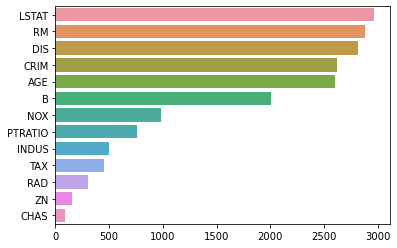

In [24]:
for model in models:
    model.fit(X,y)
    feature_seriese = pd.Series(model.feature_importances_,X.columns)
    feature_seriese = feature_seriese.sort_values(ascending=False)
    sns.barplot(x=feature_seriese,y = feature_seriese.index)